In [13]:
from speechbrain.lobes.models.FastSpeech2 import mel_spectogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa
import librosa.display
import torch

In [71]:
from scripts.noises import *

In [42]:
file_path = "data/Actor_01/03-01-01-01-01-01-01.wav"

In [85]:
def visualize(wavs, titles, sr):
    plt.figure(figsize=(16, len(wavs) * 6))
    
    for i, (wav, title) in enumerate(zip(wavs, titles)):
        D = librosa.stft(wav)
        S = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        # noise = np.random.normal(0, 5, S.shape)
        # S += noise
        plt.subplot(len(wavs), 1, i+1)

        librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spektrogram pierwszego pliku')
        
    plt.tight_layout()
    plt.show()

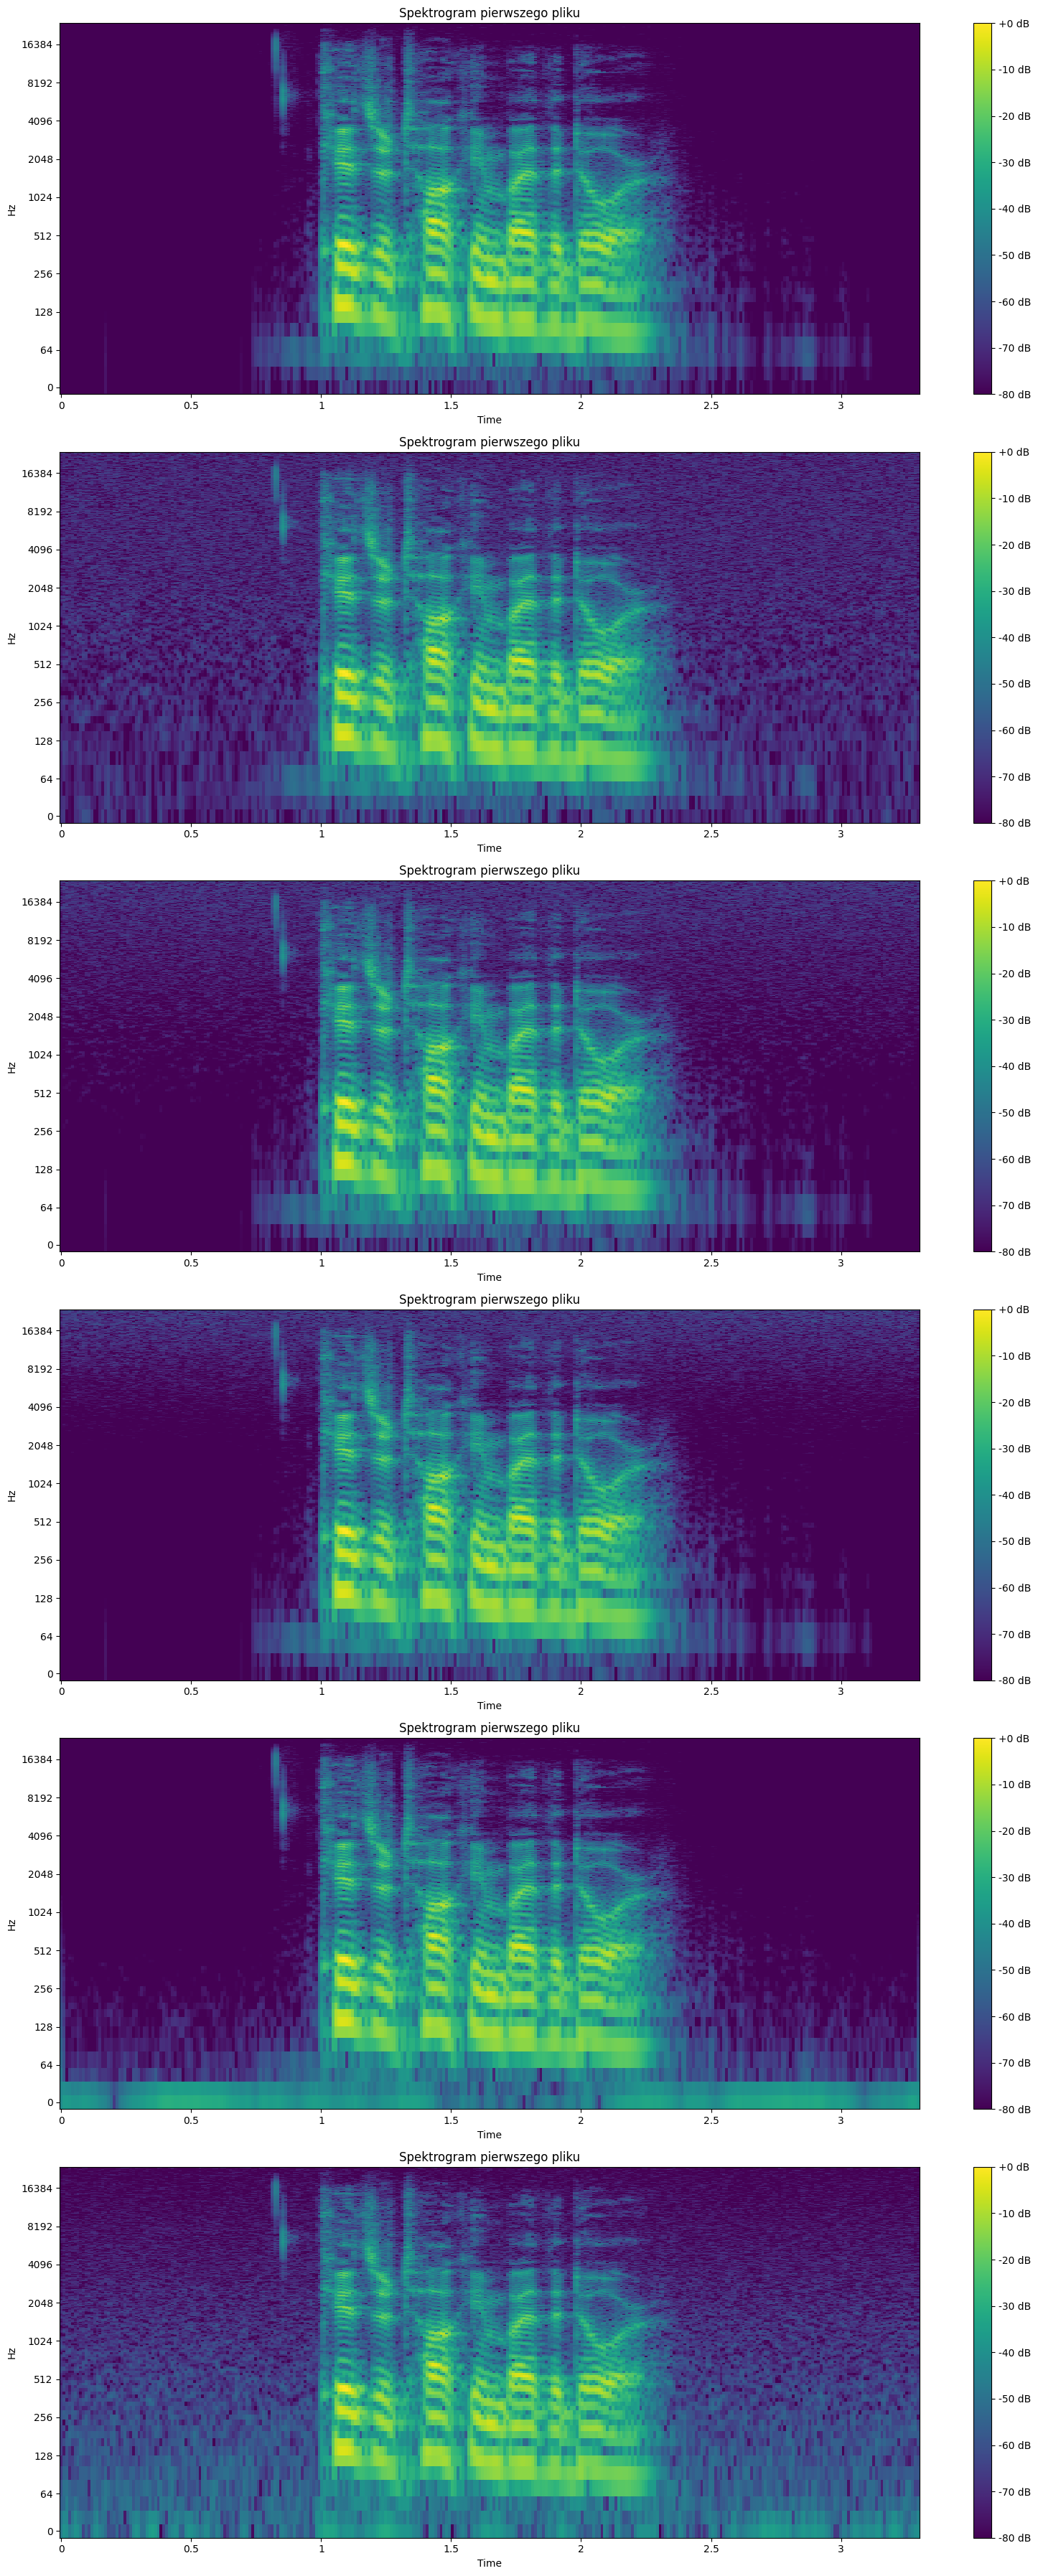

In [87]:
signal, sr = librosa.load(file_path, sr=None)

white_noise_signal = white_noise(signal.shape[0])
white_noise_signal = signal + white_noise_signal * 0.0001

blue_noise_signal = blue_noise(signal.shape[0])
blue_noise_signal = signal + blue_noise_signal * 0.0001

violet_noise_signal = violet_noise(signal.shape[0])
violet_noise_signal = signal + violet_noise_signal * 0.0001

brownian_noise_signal = brownian_noise(signal.shape[0])
brownian_noise_signal = signal + brownian_noise_signal * 0.0001

pink_noise_signal = pink_noise(signal.shape[0])
pink_noise_signal = signal + pink_noise_signal * 0.0001

visualize([signal, white_noise_signal, blue_noise_signal, violet_noise_signal, brownian_noise_signal, pink_noise_signal],
          ['original', 'white noise', 'blue noise', 'violet noise', 'brownian noise', 'pink noise'], sr)

0.004058837890625


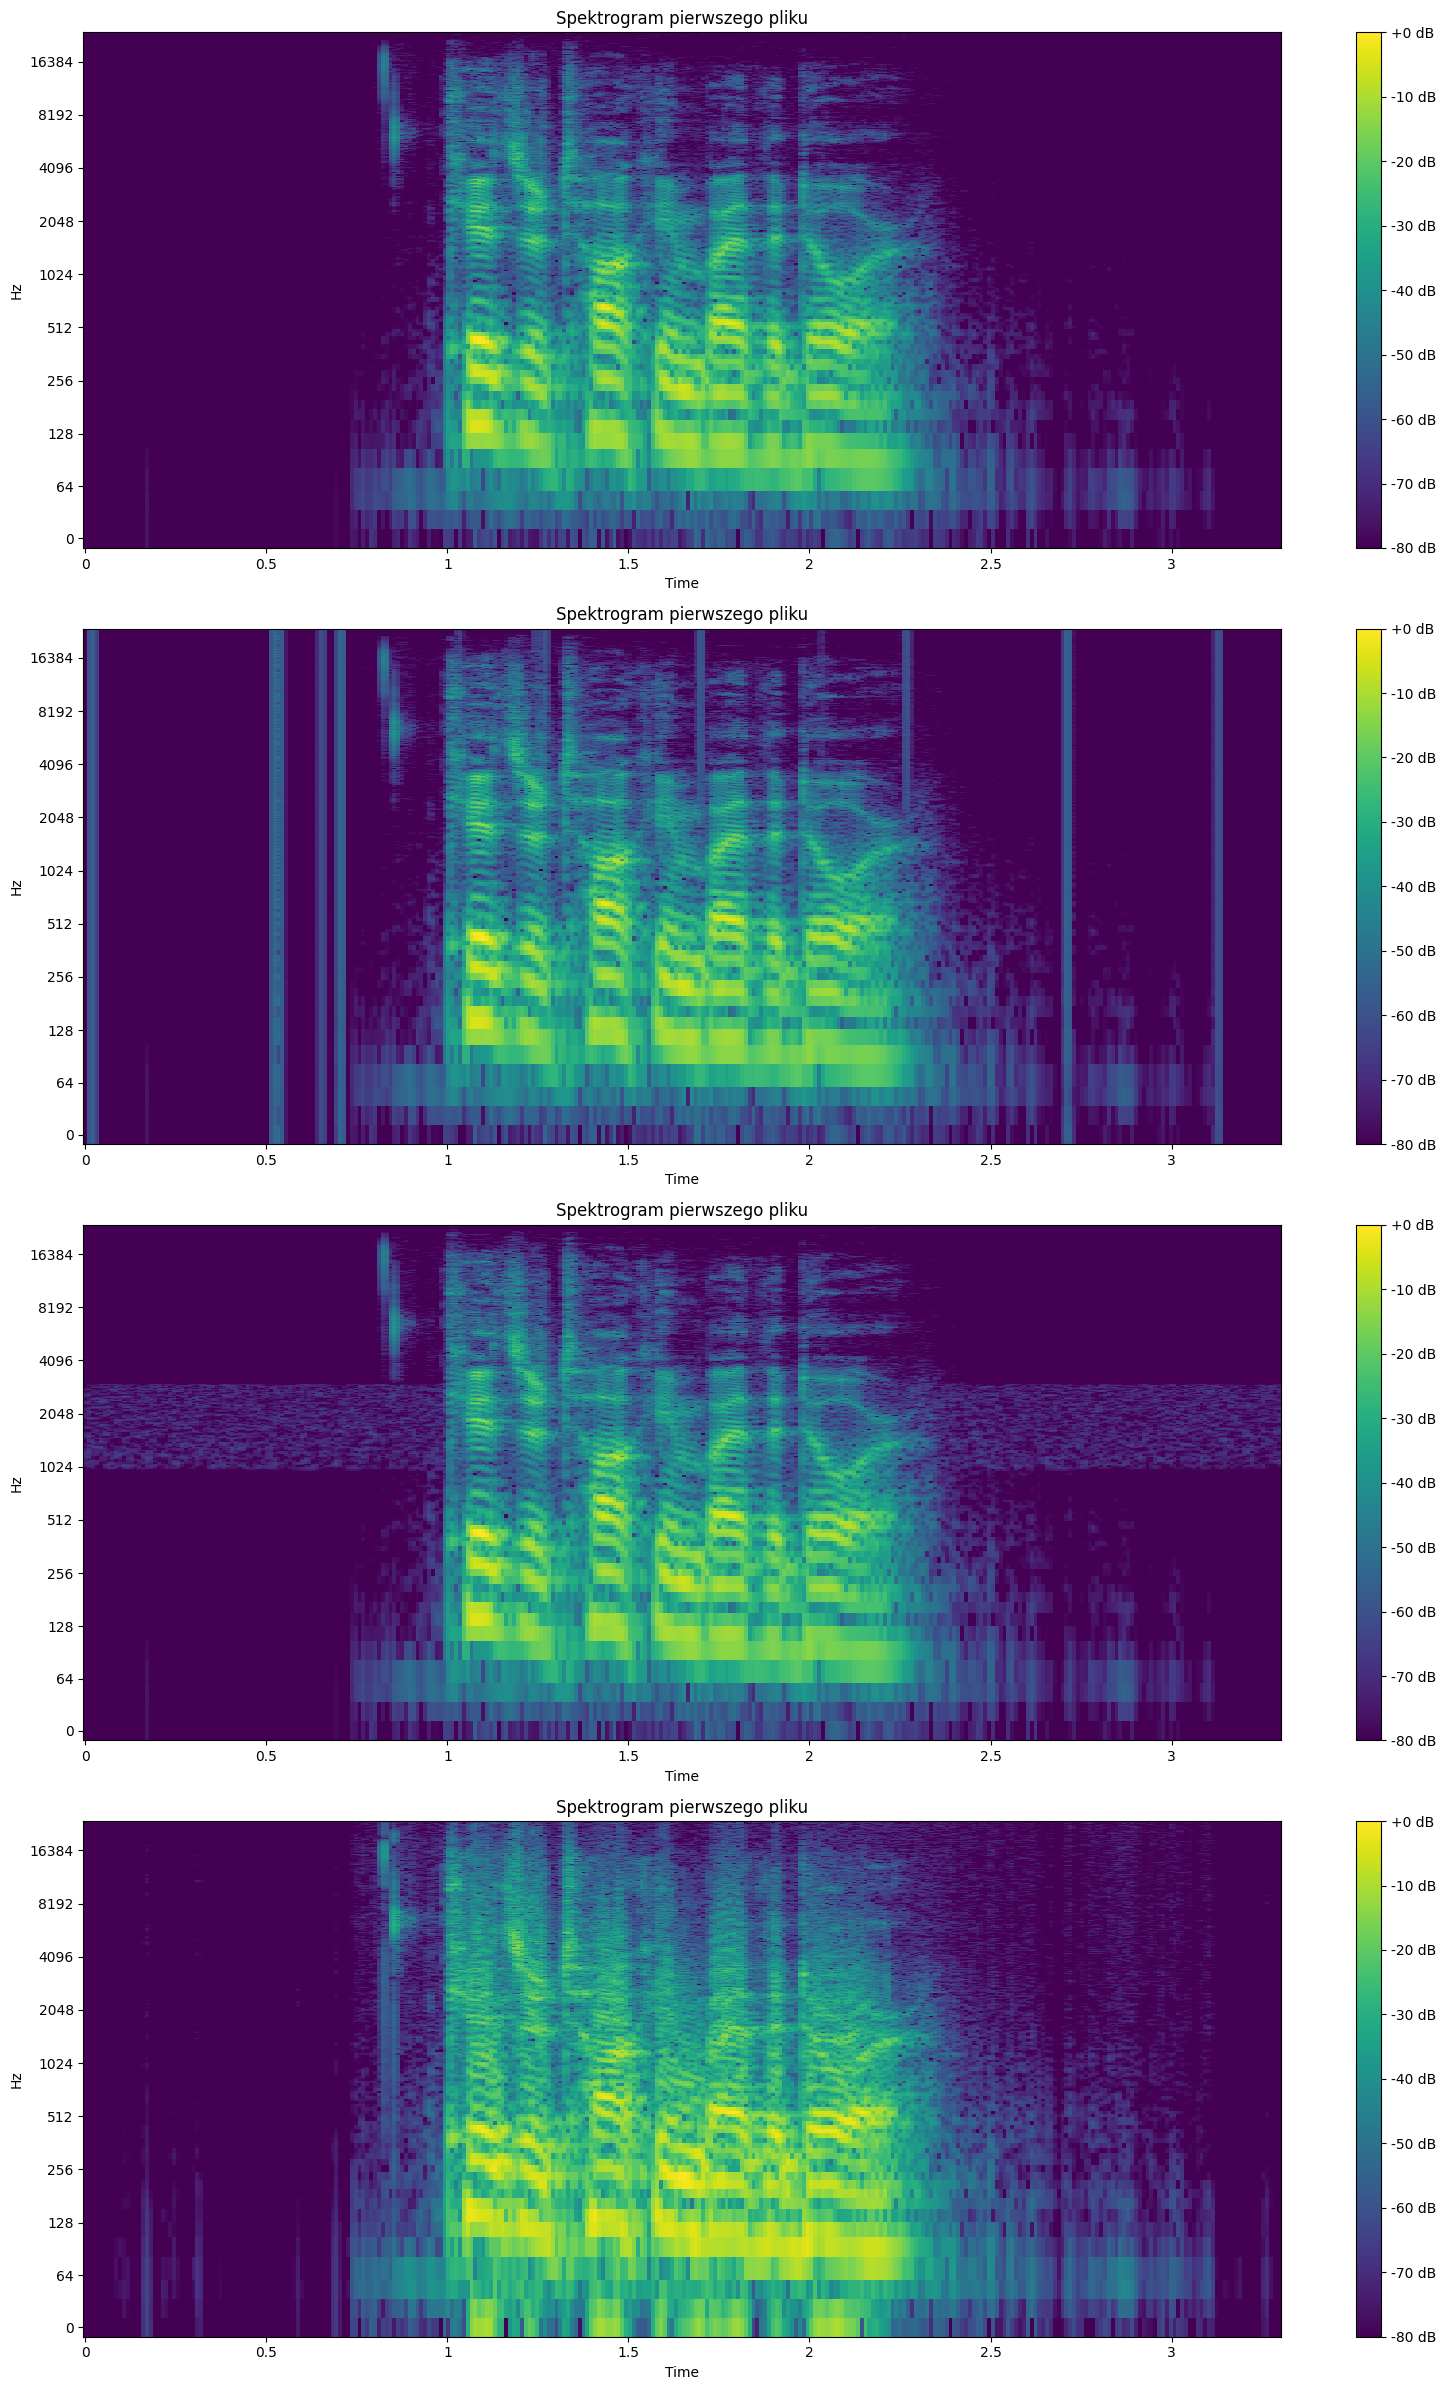

In [99]:
signal, sr = librosa.load(file_path, sr=None)
impulse_noise_signal = impulse_noise(signal, low_threshold=0.05, high_threshold=0.5, size=0.0001)
frequency_noise_signal = frequency_noise(signal, sr, min_freq=1000, max_freq=3000)
clipping_noise_signal = clipping_noise(signal, threshold=0.1)
visualize([signal, impulse_noise_signal, frequency_noise_signal, clipping_noise_signal],
          ['original', 'impulse noise', 'frequency noise', 'clipping noise'], sr)

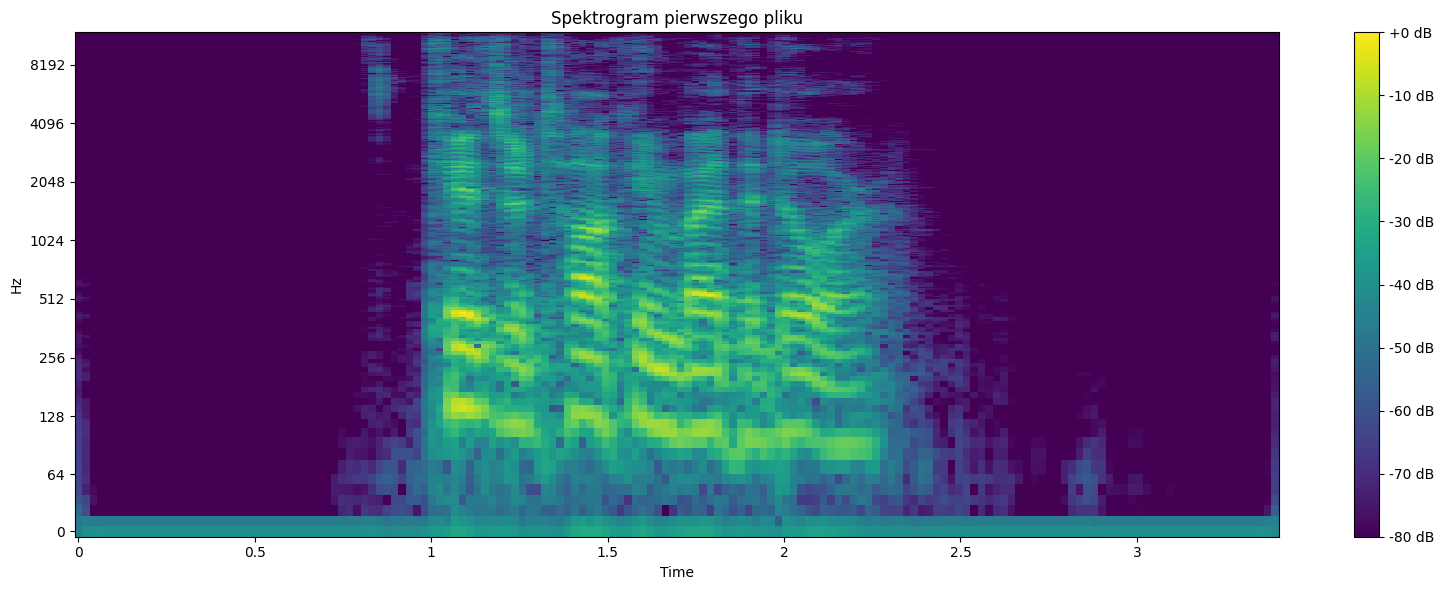

In [90]:
signal, sr = librosa.load('../generated_audio.wav', sr=None)
visualize([signal],
          ['original'], sr)